# Keras 3.0 with JAX: A Practical Introduction

This notebook provides a hands-on introduction to building, training, and manipulating neural networks using Keras 3.0, specifically with the JAX backend. We will cover building models, using different layers, initializing weights, and directly accessing and modifying model weights as NumPy arrays.

## 1. Imports and Backend Configuration

First, we import the necessary libraries. We'll explicitly set the backend to JAX to ensure we aren't using TensorFlow or PyTorch.

In [1]:
import os
# Set the Keras backend to JAX
os.environ["KERAS_BACKEND"] = "jax"

import jax
import keras
import numpy as np
import matplotlib.pyplot as plt

# Print the backend and JAX devices to confirm
print(f'Using Keras backend: {keras.backend.backend()}')
print(f'JAX devices available: {jax.devices()}')

Using Keras backend: jax
JAX devices available: [CpuDevice(id=0)]


## 2. Building a Network: Sequential vs. Functional API

Keras offers two primary ways to build models: the **Sequential API** for simple, linear stacks of layers, and the **Functional API** for more complex architectures.

### The Sequential API

This is the simplest way to build a model. You just add layers in the order they should process the data.

In [2]:
# A simple Sequential model
sequential_model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu', name='layer1'),
    keras.layers.Dense(64, activation='relu', name='layer2'),
    keras.layers.Dense(10, activation='softmax', name='output_layer')
])

sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### The Functional API

The Functional API is more flexible and allows you to build complex models, such as those with multiple inputs/outputs or shared layers.

In [3]:
# A simple model using the Functional API
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

functional_model = keras.Model(inputs=inputs, outputs=outputs)

functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Activation Function Visualizations

This code plots the Rectified Linear Unit (ReLU) and Softmax activation functions to visualize their behavior.

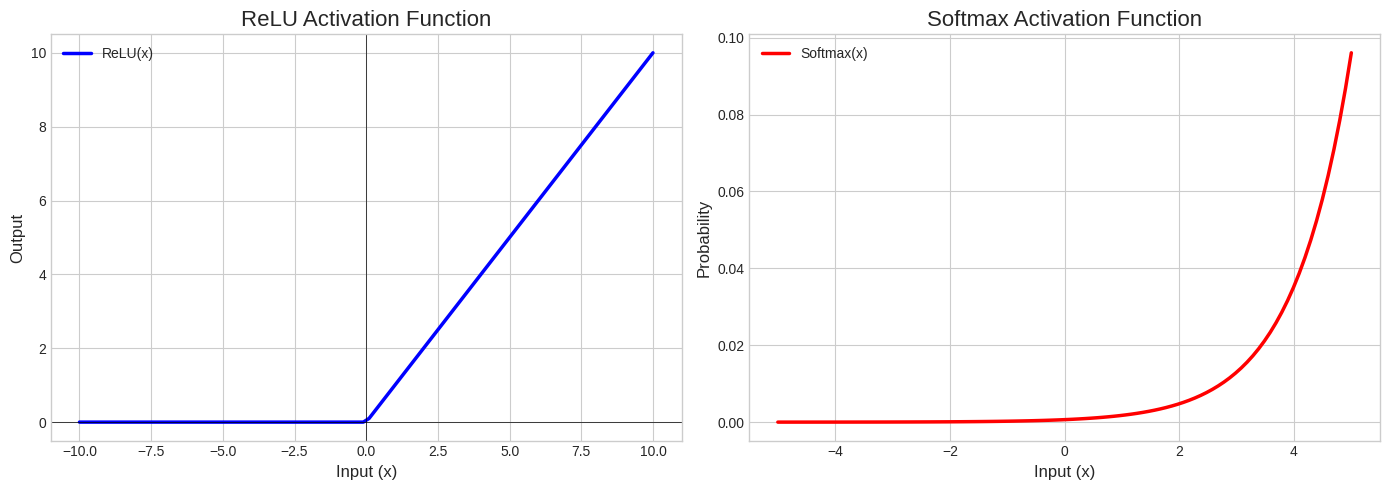

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# 1. ReLU Activation Function
x_relu = np.linspace(-10, 10, 100)
# Use np.array() to convert the JAX array to a NumPy array
y_relu = np.array(keras.activations.relu(x_relu))

# 2. Softmax Activation Function
x_softmax = np.linspace(-5, 5, 100).reshape(1, -1)
# Use np.array() here as well
y_softmax = np.array(keras.activations.softmax(x_softmax)).flatten()

# Create the plots (this part remains the same)
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot ReLU
ax1.plot(x_relu, y_relu, label='ReLU(x)', color='b', linewidth=2.5)
ax1.set_title('ReLU Activation Function', fontsize=16)
ax1.set_xlabel('Input (x)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.legend()
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)

# Plot Softmax
ax2.plot(x_softmax.flatten(), y_softmax, label='Softmax(x)', color='r', linewidth=2.5)
ax2.set_title('Softmax Activation Function', fontsize=16)
ax2.set_xlabel('Input (x)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

* **ReLU** is a simple yet powerful function that introduces non-linearity into the model, allowing it to learn more complex patterns. As you can see, it's a linear function for all positive values and zero for all negative values.
* **Softmax** is typically used in the final layer of a multi-class classification network. It takes a vector of arbitrary real-valued scores and transforms them into a probability distribution, where each value is between 0 and 1, and all values sum to 1.

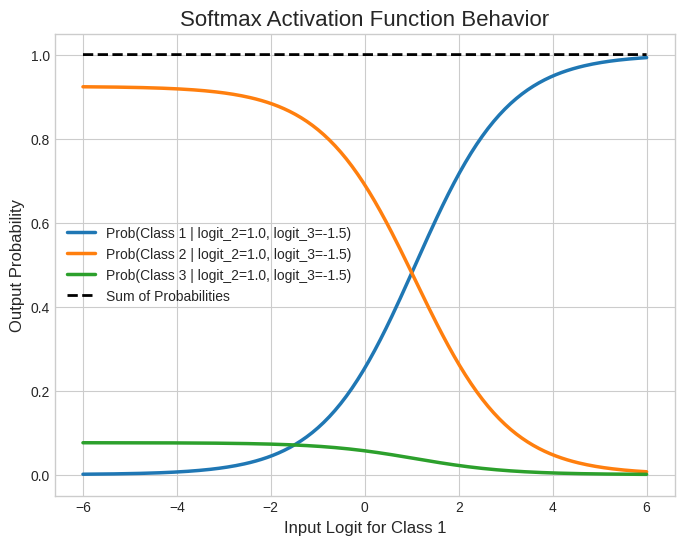

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# Define a range of input values for one class logit
x_range = np.linspace(-6, 6, 200)

# Define fixed logits for the other two classes
logit_class2 = 1.0
logit_class3 = -1.5

# Calculate softmax outputs by varying the logit for the first class
softmax_outputs = []
for x in x_range:
    # Create the input vector of logits [class1, class2, class3]
    logits = np.array([[x, logit_class2, logit_class3]])
    
    # Apply the softmax activation
    probabilities = keras.activations.softmax(logits)
    
    # Convert from JAX array to NumPy array and store
    softmax_outputs.append(np.array(probabilities).flatten())

# Convert list to a NumPy array for easy plotting
softmax_outputs = np.array(softmax_outputs)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Plot the probability of each class
plt.plot(x_range, softmax_outputs[:, 0], label=f'Prob(Class 1 | logit_2={logit_class2}, logit_3={logit_class3})', linewidth=2.5)
plt.plot(x_range, softmax_outputs[:, 1], label=f'Prob(Class 2 | logit_2={logit_class2}, logit_3={logit_class3})', linewidth=2.5)
plt.plot(x_range, softmax_outputs[:, 2], label=f'Prob(Class 3 | logit_2={logit_class2}, logit_3={logit_class3})', linewidth=2.5)

# Plot the sum of probabilities to show it's always 1
plt.plot(x_range, np.sum(softmax_outputs, axis=1), label='Sum of Probabilities', color='black', linestyle='--', linewidth=2)

plt.title('Softmax Activation Function Behavior', fontsize=16)
plt.xlabel('Input Logit for Class 1', fontsize=12)
plt.ylabel('Output Probability', fontsize=12)
plt.legend(loc='best')
plt.ylim([-0.05, 1.05])
plt.grid(True)
plt.show()

* **Competition Between Classes**: As the input logit for **Class 1** increases (the x-axis), its output probability (the blue line) rises toward 1.
* **Conservation of Probability**: Consequently, the probabilities for **Class 2** (orange) and **Class 3** (green) are "squashed" down toward 0.
* **Sum is Always 1**: The dashed black line confirms that at any point, the sum of the probabilities for all three classes is exactly 1, which is the core property of the softmax function.

## 3. Core Layers and Weight Initialization

Keras provides a wide range of layers. Here are some of the most common ones and how to initialize their weights.

  * **`Dense`**: A standard, fully-connected layer.
  * **`Conv2D`**: A 2D convolution layer, typically used for images.
  * **`MaxPooling2D`**: Downsamples the input.
  * **`Flatten`**: Converts a multi-dimensional tensor into a 1D vector.
  * **`Dropout`**: A regularization technique to prevent overfitting.

You can specify the weight initializer for a layer using the `kernel_initializer` argument. The default is `glorot_uniform`.

In [6]:
# Example of different layers and initializers
model_with_initializers = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    
    # Convolutional layer with He Normal initialization
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                       kernel_initializer='he_normal'),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    
    # Dense layer with Glorot Uniform (default)
    keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform'),
    
    # Output layer with a specific random normal initializer
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05))
])

model_with_initializers.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Training and Prediction

Let's build a simple model, train it on some synthetic data, and make predictions.

### a. Generate Synthetic Data

We'll create a simple binary classification dataset.

In [7]:
# Generate some dummy data
np.random.seed(42)
X_train = np.random.rand(1000, 20)
y_train = (np.sum(X_train, axis=1) > 10).astype(int) # Simple rule for classification

X_test = np.random.rand(200, 20)
y_test = (np.sum(X_test, axis=1) > 10).astype(int)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1000, 20)
y_train shape: (1000,)


### b. Compile and Train the Model

Before training, we need to **compile** the model, which configures it for training. We specify:

  * **`optimizer`**: The algorithm to update the weights (e.g., `'adam'`).
  * **`loss`**: The function to measure the model's error (e.g., `'sparse_categorical_crossentropy'`).
  * **`metrics`**: The performance metrics to monitor (e.g., `'accuracy'`).

In [8]:
# Build a simple model for our data
training_model = keras.Sequential([
    keras.Input(shape=(20,)),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
training_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = training_model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1 # Set to 0 for silent training
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4825 - loss: 0.8455 - val_accuracy: 0.5250 - val_loss: 0.7049
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.5113 - loss: 0.7666 - val_accuracy: 0.5100 - val_loss: 0.7033
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.5088 - loss: 0.7675 - val_accuracy: 0.5300 - val_loss: 0.6942
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.5350 - loss: 0.7291 - val_accuracy: 0.5700 - val_loss: 0.6828
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.4950 - loss: 0.7400 - val_accuracy: 0.5950 - val_loss: 0.6786
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.5625 - loss: 0.7009 - val_accuracy: 0.6050 - val_loss: 0.6749
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5288 - loss: 0.7085 - val_accuracy: 0.6200 - val_loss: 0.6662
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5387 - loss: 0.7081 - val_accuracy: 0.6250 

### c. Visualize Training History

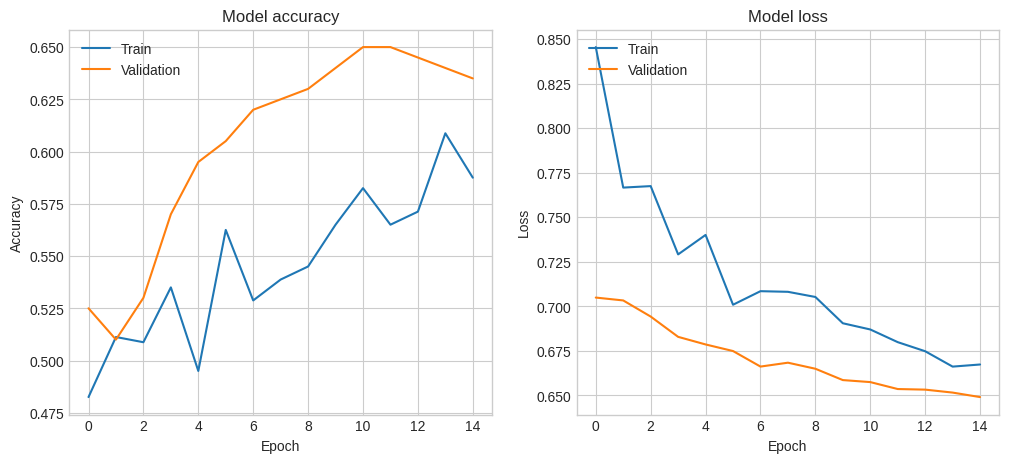

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### d. Make Predictions

We can now use our trained model to make predictions on the test set.

In [10]:
# Make predictions on the test data
predictions_prob = training_model.predict(X_test)
predictions_class = (predictions_prob > 0.5).astype(int)

# Print the first 10 predictions vs actual labels
print("Predictions (class):", predictions_class.flatten()[:10])
print("Actual labels:      ", y_test[:10])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predictions (class): [1 0 1 1 1 1 0 1 0 1]
Actual labels:       [0 0 1 1 1 1 0 0 0 1]


## 5. Direct Weight Manipulation

Keras allows you to directly access and modify the weights of your model's layers as NumPy arrays. This is useful for custom initialization, model analysis, or transfer learning.

### a. Getting Weights

The `layer.get_weights()` method returns a list of NumPy arrays: `[kernel_weights, bias_weights]`.

In [11]:
# Get the first dense layer from our trained model
first_layer = training_model.layers[0]

# Get the weights
weights = first_layer.get_weights()
kernel_weights, bias_weights = weights

print("Shape of Kernel Weights:", kernel_weights.shape)
print("Shape of Bias Weights:", bias_weights.shape)

Shape of Kernel Weights: (20, 64)
Shape of Bias Weights: (64,)


### b. Unraveling Weights into a 1D Array

To manipulate all weights of a layer as a single vector, you can "unravel" or flatten them.

In [12]:
# Ravel the kernel weights into a 1D array
unraveled_kernel = np.ravel(kernel_weights)
print("Unraveled kernel shape:", unraveled_kernel.shape)
print("First 5 unraveled kernel weights:", unraveled_kernel[:5])

Unraveled kernel shape: (1280,)
First 5 unraveled kernel weights: [ 0.2616234   0.5826151  -0.18435882  0.38213992 -0.01536176]


### c. Modifying and Setting Weights

Let's modify the first 5 weights of the kernel and set them back into the model.

In [13]:
# Get original weights
original_weights = first_layer.get_weights()[0]
print("Original first 5 kernel weights (flat):", np.ravel(original_weights)[:5])

# Create a copy to modify
modified_kernel = original_weights.copy()

# Modify the first 5 weights
modified_kernel.flat[:5] = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Set the modified weights back into the layer
# Note: You must provide both kernel and bias weights, so we keep the original bias.
first_layer.set_weights([modified_kernel, bias_weights])

# Verify the change
new_weights = first_layer.get_weights()[0]
print("New first 5 kernel weights (flat):     ", np.ravel(new_weights)[:5])

Original first 5 kernel weights (flat): [ 0.2616234   0.5826151  -0.18435882  0.38213992 -0.01536176]
New first 5 kernel weights (flat):      [0.1 0.2 0.3 0.4 0.5]


This demonstrates how you can gain low-level control over your model's parameters, treating them just like any other NumPy array.